In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
# n trials on same set of 2 frames (sensor noise re-applied and initial conds randomized for each trial)

#part 1--------------------------
# with extended surface mitigation
fn1 = "MC_results/scene1_ICET_estimates_v5.npy" 
fn2 = "MC_results/scene1_ICET_pred_stds_v5.npy"
# v4 = 500 trials @ 5iter, v5 = 50 trials @ 10 iter, vj6 = 10 trials, noise ~0.05

# #no extended surface mitigation
# fn1 = "MC_results/scene1_ICET_estimates_NM_v4.npy" 
# fn2 = "MC_results/scene1_ICET_pred_stds_NM_v4.npy"
# #v3=500 trials with 5 iter, v4=500 trials with 
#---------------------------------

#part 2---------------------------
# with extended surface mitigation
# fn1 = "MC_results/scene2_ICET_estimates_v3.npy" 
# fn2 = "MC_results/scene2_ICET_pred_stds_v3.npy"
#v1 = 500, v2 = 50 test, v3 -= 500 (best)

# # #no extended surface mitigation
# fn1 = "MC_results/scene2_ICET_estimates_NM_v3.npy" 
# fn2 = "MC_results/scene2_ICET_pred_stds_NM_v3.npy"
#v1 = 500, v2 = 50 test, v3=500 (best)
#---------------------------------

# #part 3-------------------------
# # with extended surface mitigation
# # fn1 = "MC_results/scene3_ICET_estimates_v1.npy" 
# # fn2 = "MC_results/scene3_ICET_pred_stds_v1.npy"

# # # #no extended surface mitigation
# fn1 = "MC_results/scene3_ICET_estimates_NM_v1.npy" 
# fn2 = "MC_results/scene3_ICET_pred_stds_NM_v1.npy"
# #---------------------------------

est = np.load(fn1)
pred_stds = np.load(fn2)

print(np.mean(pred_stds, axis = 0)[:3])
print(np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))

# print(np.std(pred_stds, axis = 0)) #shows consistant prediction for soln std for constant scene

[0.00012433 0.00073712 0.00015195]
[0.00129316 0.00215245 0.00104748]


In [3]:
#remove outliers from est

# # #vertical axis
ok = np.where(abs(est[:,2]) < 0.0003)
est = est[ok]
# #roll
ok3 = np.where(abs(est[:,3]) < 0.000058)
est = est[ok3]
#pitch
ok4 = np.where(abs(est[:,4]) < 0.000067)
est = est[ok4]
# #yaw
# ok5 = np.where(abs(est[:,5]) < 0.0000476)
# est = est[ok5]

#calc mean and std
mean = np.mean(est, axis = 0)
# print(mean, "\n")
std = np.std(est, axis = 0)
std[3:] = np.rad2deg(std[3:]) #convert angles to degrees
std += np.abs(mean) #add in any net offset

print(std)

[0.00013514 0.00077991 0.00014795 0.00123875 0.00179378 0.00110836]


<IPython.core.display.Javascript object>


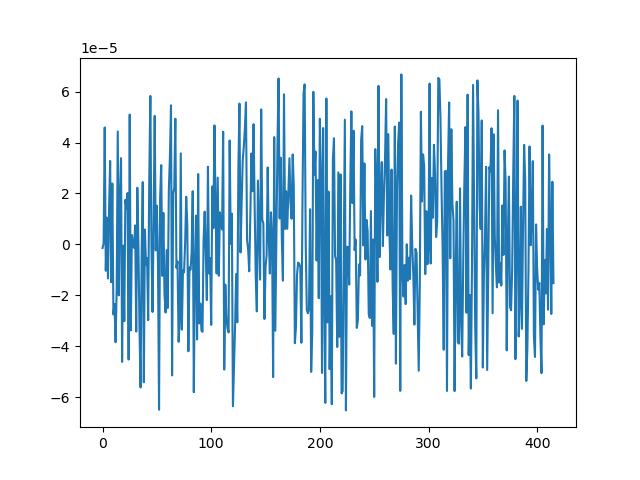

[0.00012621 0.00068076 0.00013074]
[0.00123853 0.00179196 0.00110752]


In [4]:
#for debug - plot pred_stds to make sure we don't have any outlier trials
fig, ax = plt.subplots()

# ax.plot(pred_stds[:,2])

ax.plot(est[:,4]) 
# ax.plot(np.rad2deg(est[:,4]))

ok = np.where(abs(est[:,2]) < 0.0003)
# ok = np.where(abs(est[:,2]) < 0.1)

# print(ok)
print(np.std(est[ok], axis = 0)[:3])
print(np.rad2deg(np.std(est[ok], axis = 0))[3:])

In [ ]:
bad = np.where(est[:,0] > -0.35)
print(bad)
print(est)